<a href="https://colab.research.google.com/github/Junaid-Narkar/Heart-Health-Data-Analysis---Decision-Tree/blob/main/Heart_Health_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = '/content/heart-1.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Explanation of each column:

1) **age:** Age of the patient in years.

2) **sex:** Gender of the patient (0 for female, 1 for male).

3) **cp:** Chest pain type. This column likely represents different categories or levels of chest pain experienced by the patient, which might be measured on an ordinal scale.

4) **trestbps:** Resting blood pressure (in mm Hg) measured at admission to the hospital.

5) **chol:** Serum cholesterol level (in mg/dl) at admission to the hospital.

6) **fbs:** Fasting blood sugar level. This column likely indicates whether the patient had a fasting blood sugar level higher than 120 mg/dl (1 for yes, 0 for no).

7) **restecg:** Resting electrocardiographic results. This column may represent different categories or levels of resting ECG results.

8) **thalach:** Maximum heart rate achieved during the exercise test.

9) **exang:** Exercise-induced angina (1 for yes, 0 for no). It indicates whether the patient experienced angina (chest pain or discomfort) during exercise.

10) **oldpeak:** ST depression induced by exercise relative to rest. This is a measure of how much the ST segment of the ECG changes during exercise compared to rest.

11) **slope:** The slope of the peak exercise ST segment. This likely represents different categories or levels of the slope of ST segment changes during exercise.

12) **ca:** The number of major vessels (0-3) colored by fluoroscopy. This is often used as a measure of the number of blood vessels with significant narrowing.

13) **thal:** A blood disorder called thalassemia (a categorical variable with different levels).

14) **target:** The target variable or the outcome you're trying to predict. In the context of heart disease prediction, this column typically indicates whether a patient has heart disease (1 for yes, 0 for no).

In [3]:
df.shape

(303, 14)

In [4]:
df[df['chol']>300].shape

(43, 14)

In [5]:
f = df[df['thal']==2]
f.shape

(166, 14)

In [6]:
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [8]:
f[f['target']==1].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
29   1    1   130       204   0    0        202      0      0.0      2      0   2     1         1
57   0    0   120       354   0    1        163      1      0.6      2      0   2     1         1
55   0    1   132       342   0    1        166      0      1.2      2      0   2     1         1
              135       250   0    0        161      0      1.4      1      0   2     1         1
                                                                                               ..
45   0    1   130       234   0    0        175      0      0.6      1      0   2     1         1
              112       160   0    1        138      0      0.0      1      0   2     1         1
          0   138       236   0    0        152      1      0.2      1      0   2     1         1
44   1    2   140       235   0    0        180      0      0.0      2      0   2     1         1
76   0    2   140       197   0    2        116      0      1.1      1      0   2     1         1
Name: count, Length: 129, dtype: int64

In [9]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [10]:
df.shape

(303, 14)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribution')

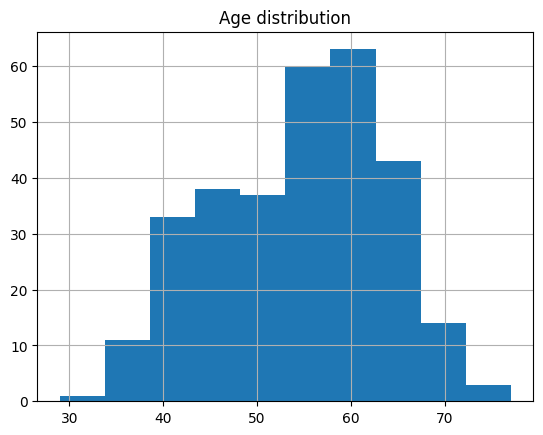

In [15]:
df['age'].hist(grid=True,bins=10);
plt.title('Age distribution')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

<ipython-input-16-3856388fd40c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='female')
<ipython-input-16-3856388fd40c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],label='male')


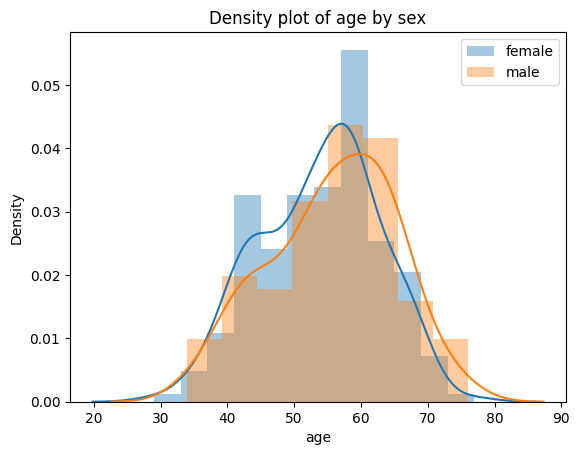

In [16]:
sns.distplot(df[df['sex']==1]['age'],label='female')
sns.distplot(df[df['sex']==0]['age'],label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting blood pressure distribution')

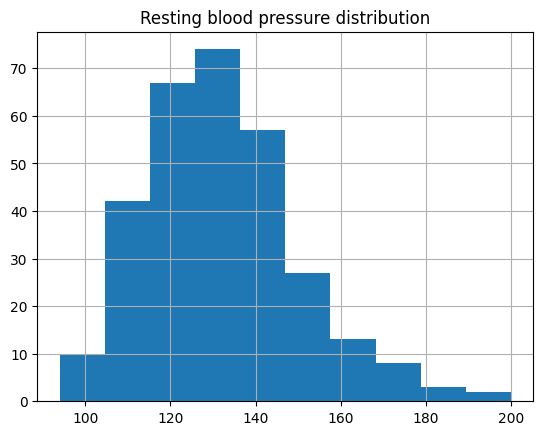

In [17]:
df['trestbps'].hist()
plt.title('Resting blood pressure distribution')

<ipython-input-20-307d8b233f4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'],bins=10)


Text(0.5, 1.0, 'Resting blood pressure density plot')

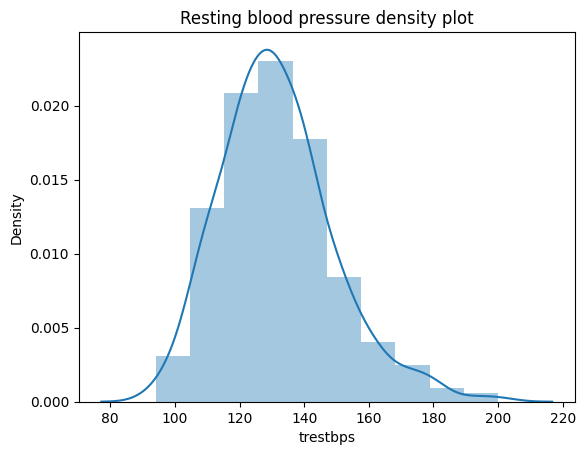

In [20]:
sns.distplot(df['trestbps'],bins=10)
plt.title('Resting blood pressure density plot')

In the above grapgh, we are having a normal distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

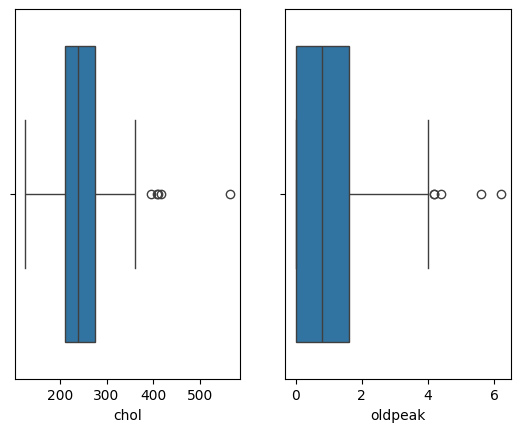

In [21]:
fig,axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='chol',data=df,orient='v',ax=axes[0])
sns.boxplot(x='oldpeak',data=df,orient='v',ax=axes[1])

In [22]:
fruits = ['apple','mango','banana','orange','grapes']
for index,fruits in enumerate(fruits):
  print(index,fruits)

0 apple
1 mango
2 banana
3 orange
4 grapes


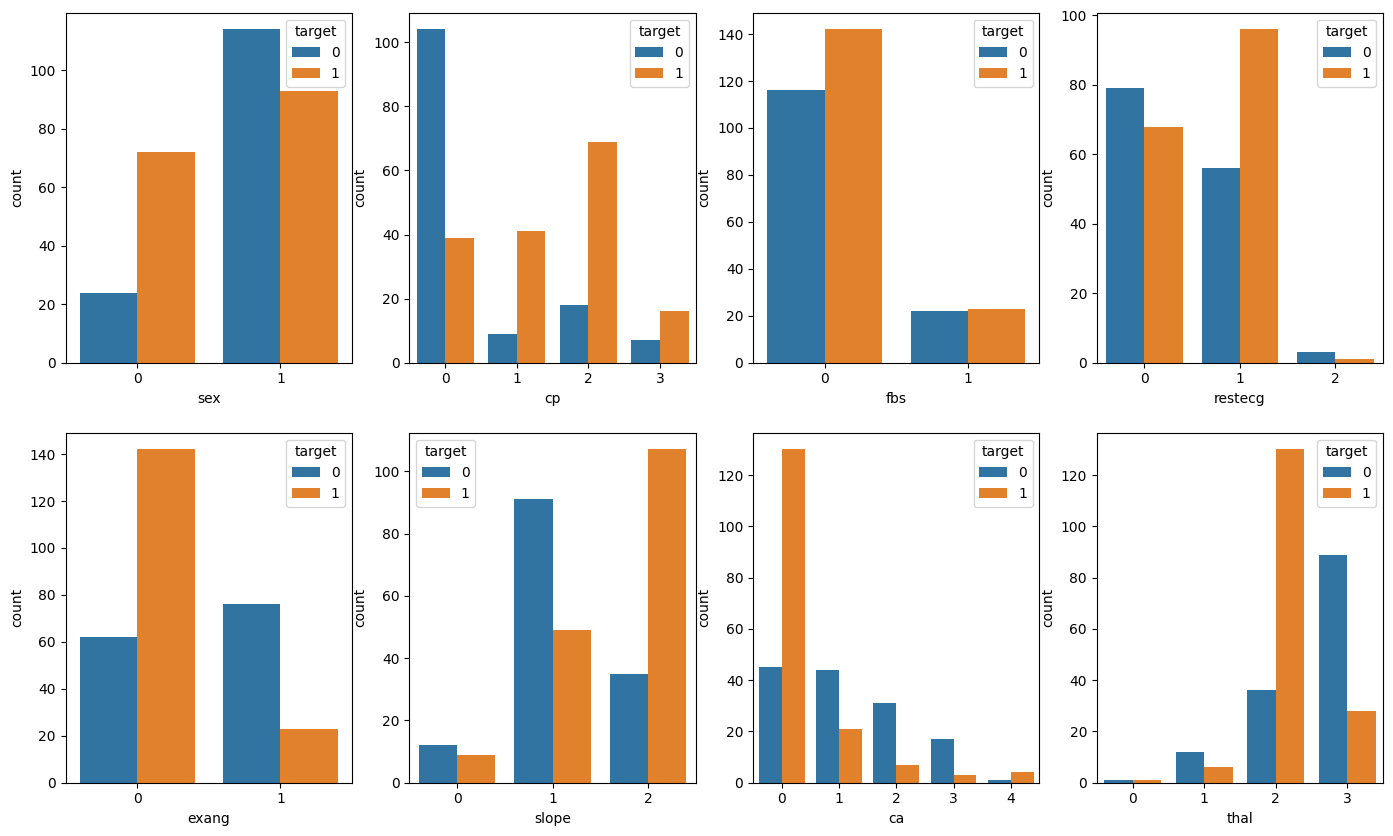

In [23]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
  if feature != 'target':
    ax = axes[int(idx/4),idx%4]
    sns.countplot(x=feature,hue='target',data=df,ax=ax)

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

Text(0.5, 1.0, 'Count of target feature by sex')

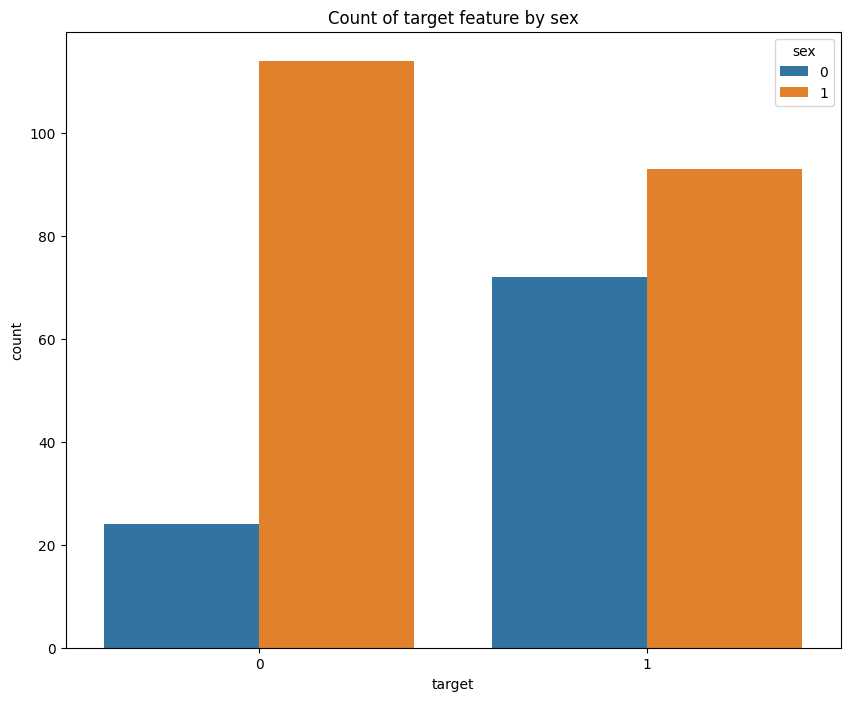

In [24]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

<Axes: >

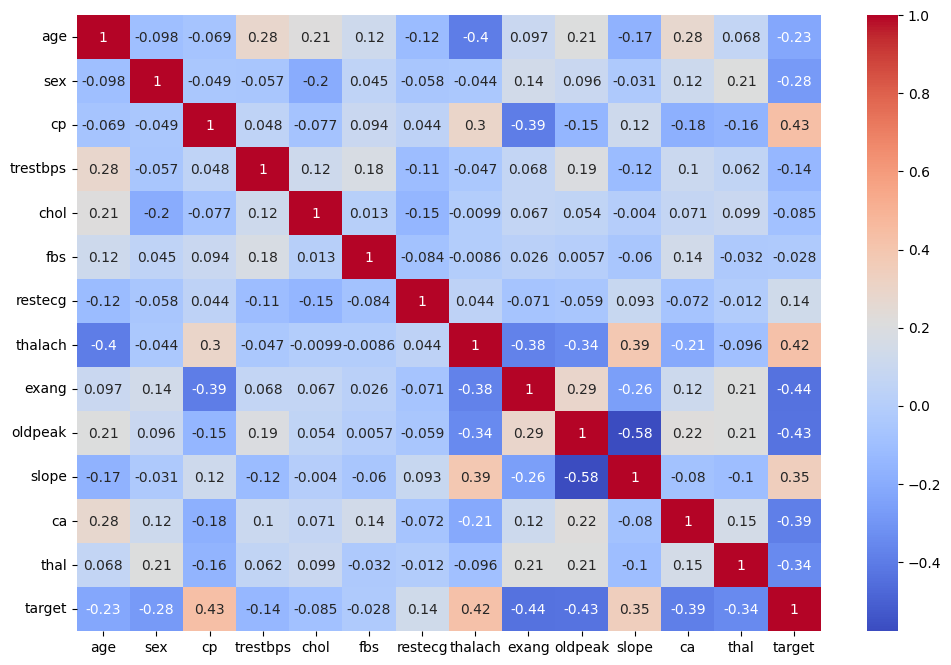

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Apparently there are no features with a pretty strong correlation (above |0.7|)

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

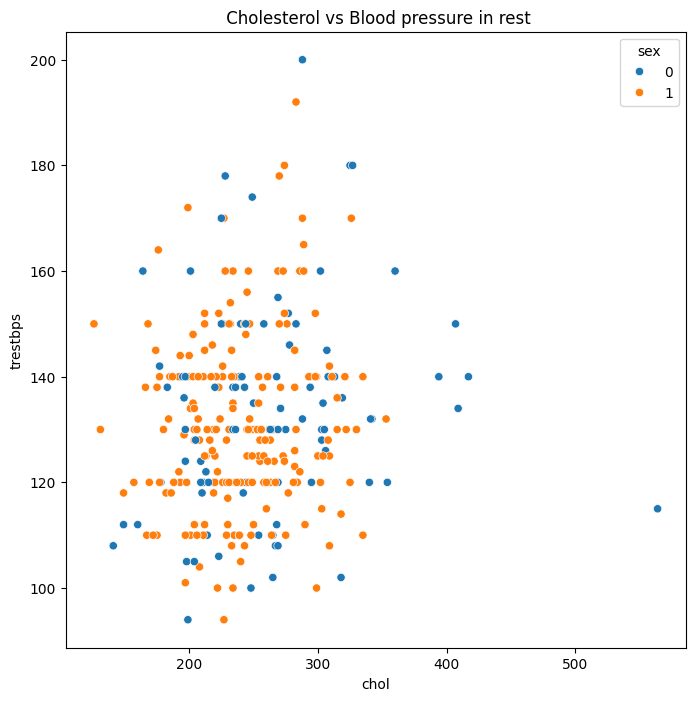

In [26]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

In [27]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


In [28]:
import pandas as pd

data = pd.read_csv('/content/heart-1.csv')

In [29]:
from autoviz.AutoViz_Class import AutoViz_Class


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [30]:
AV=AutoViz_Class()
report = AV.AutoViz(
    filename='/content/heart-1.csv',
    sep=',',
    depVar='',
    dfte=data,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='html',
    max_rows_analyzed=150000,
    max_cols_analyzed=30
)

Shape of your Data Set loaded: (303, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No scatter plots with depVar when no depVar is given.


Saving distplots_nums in HTML format


Saving violinplots in HTML format


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                               

Time to run AutoViz (in seconds) = 17


In [31]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.9 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


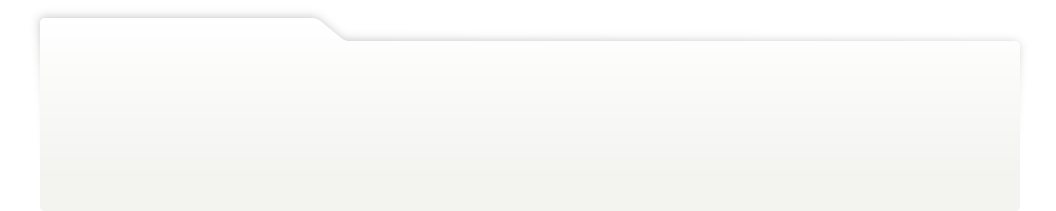
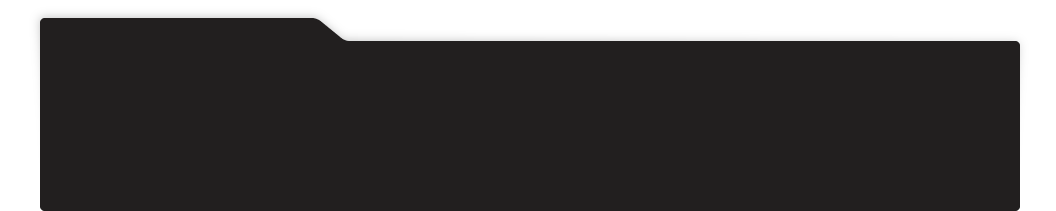
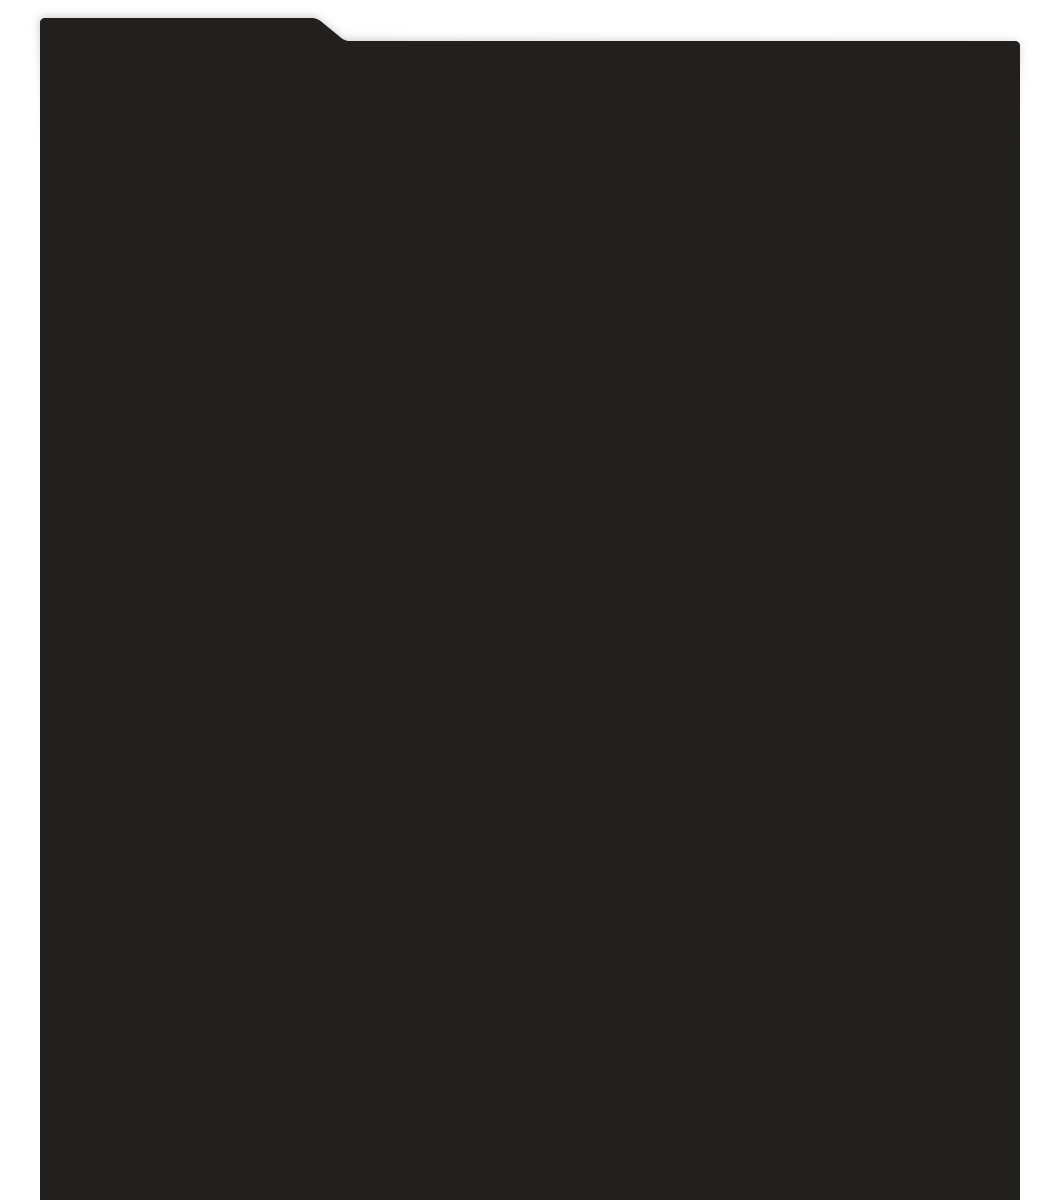
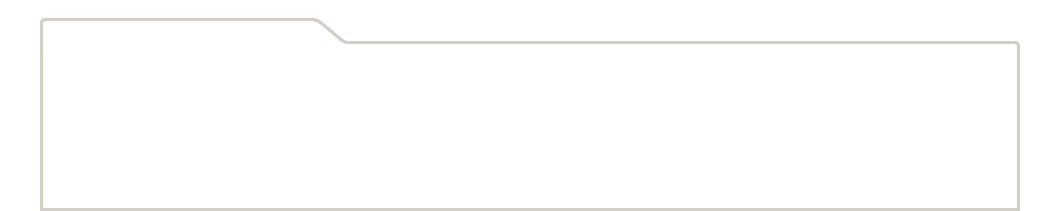
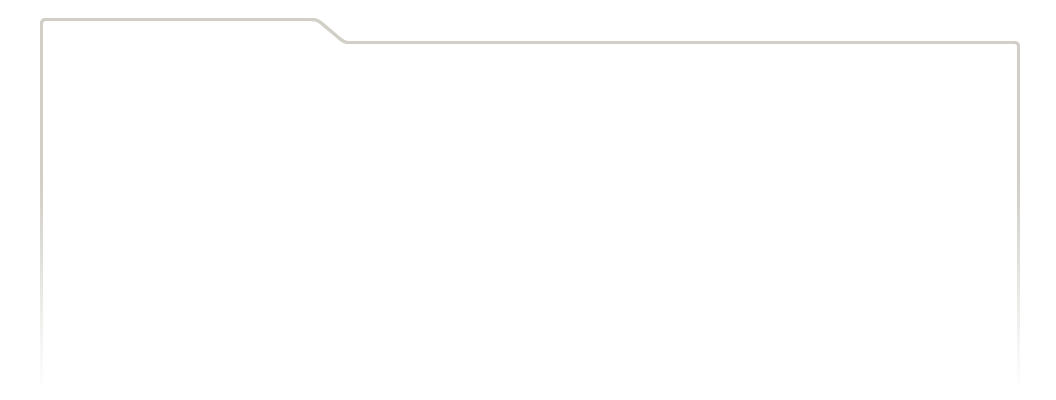
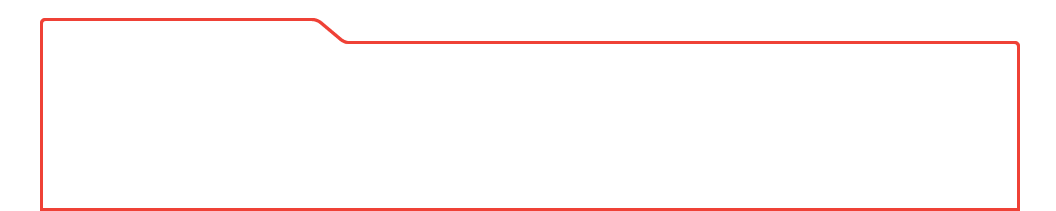
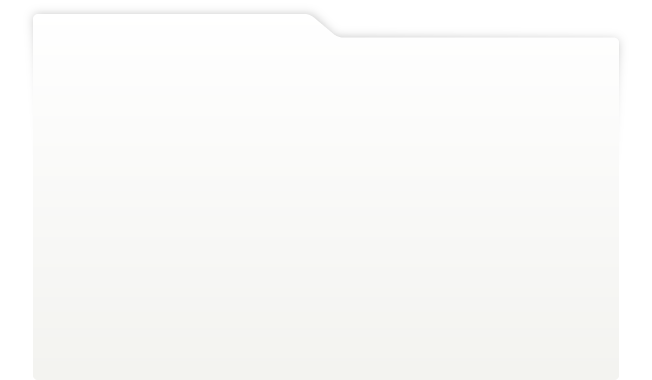
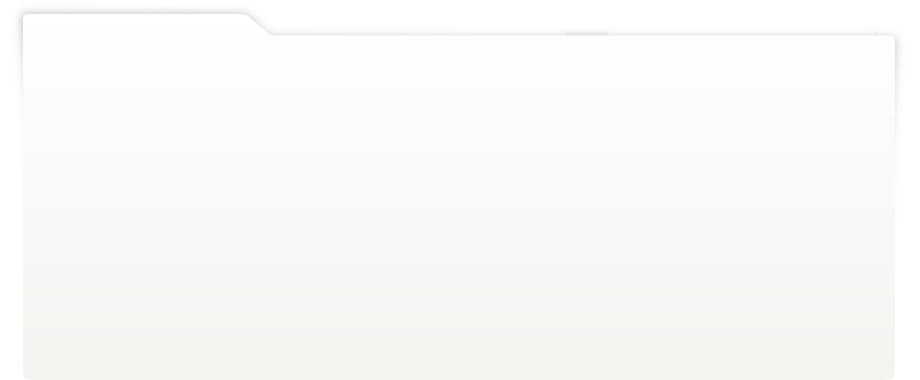
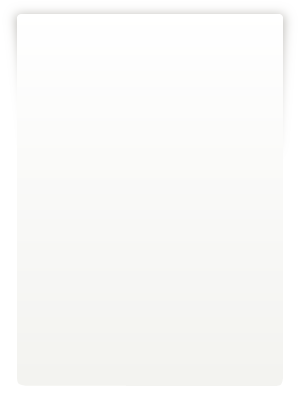
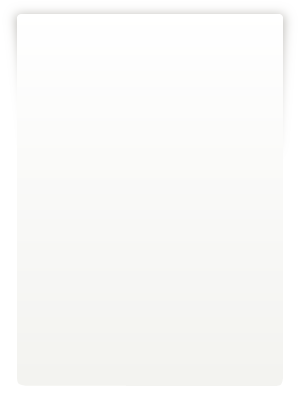
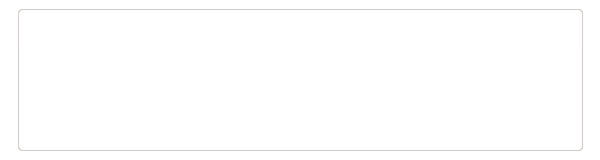
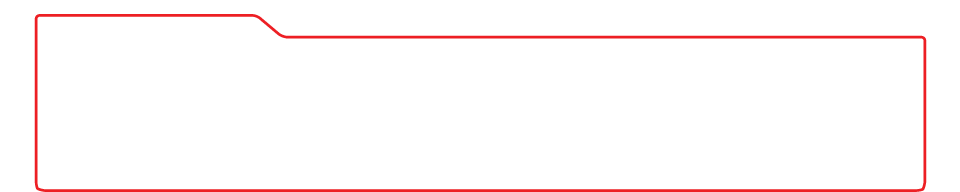
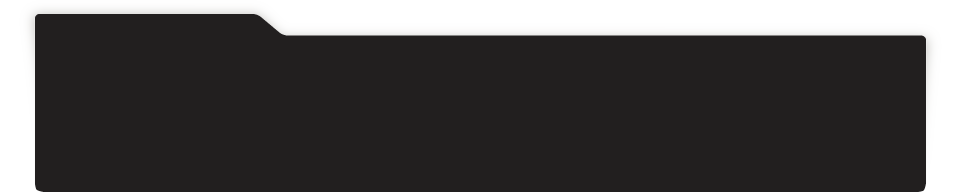
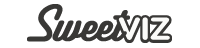
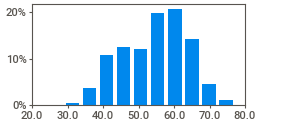
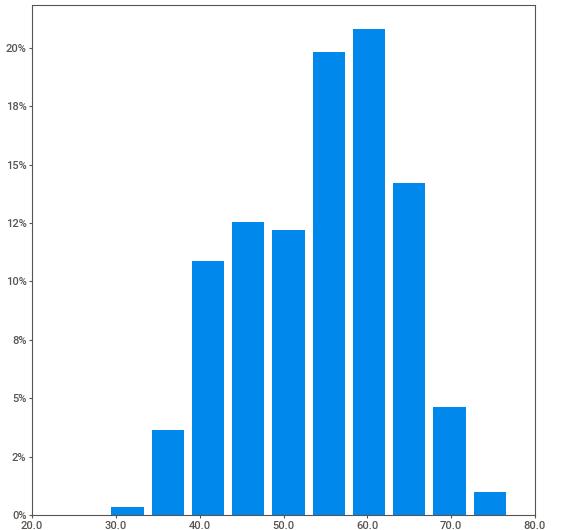
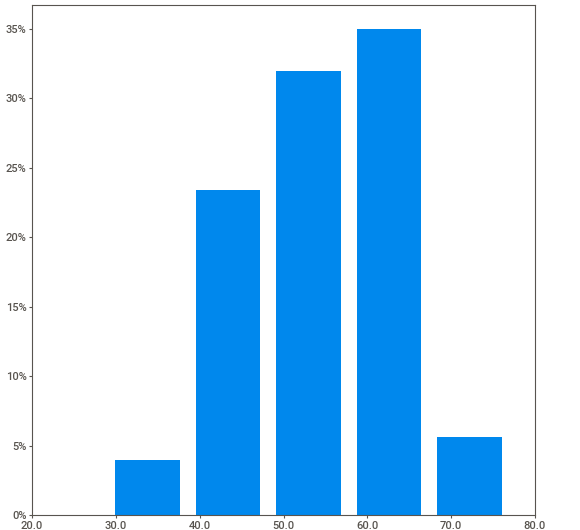
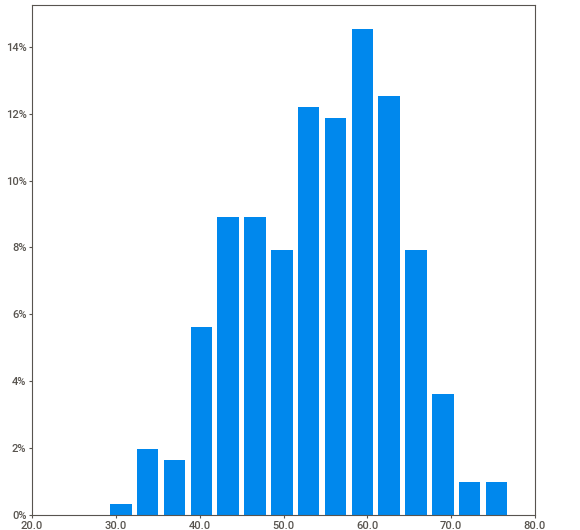
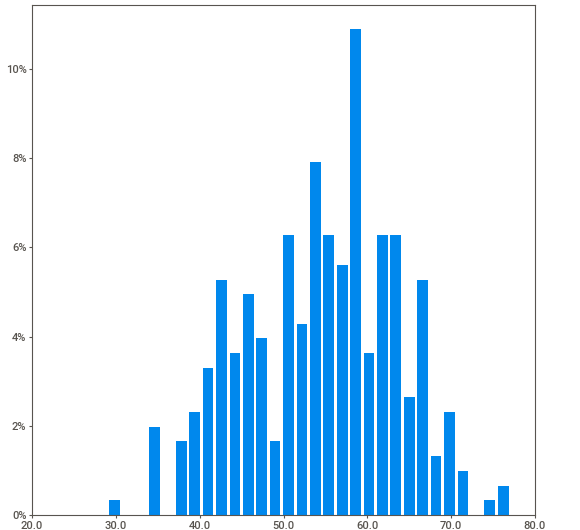
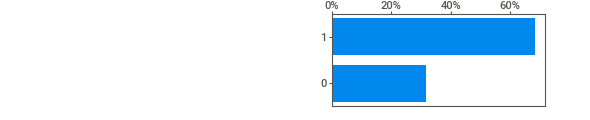
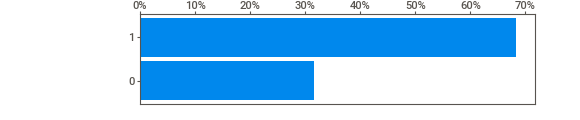
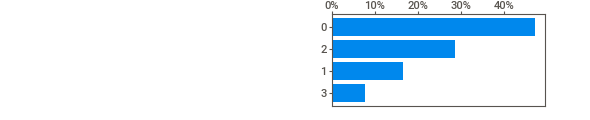
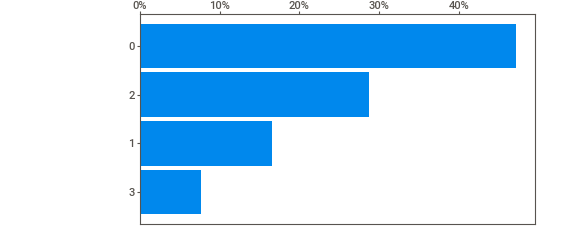
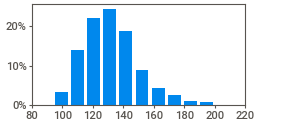
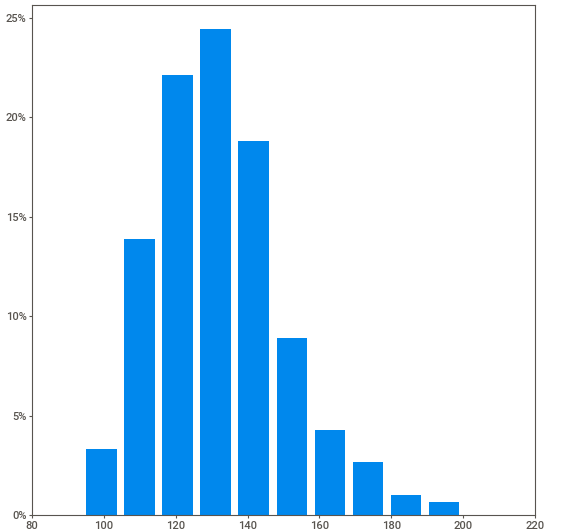
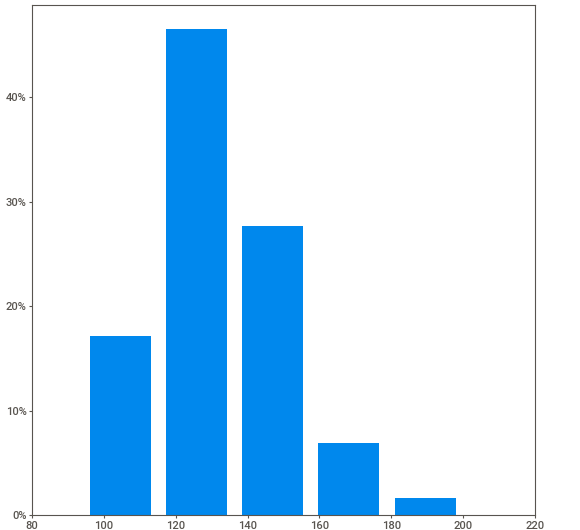
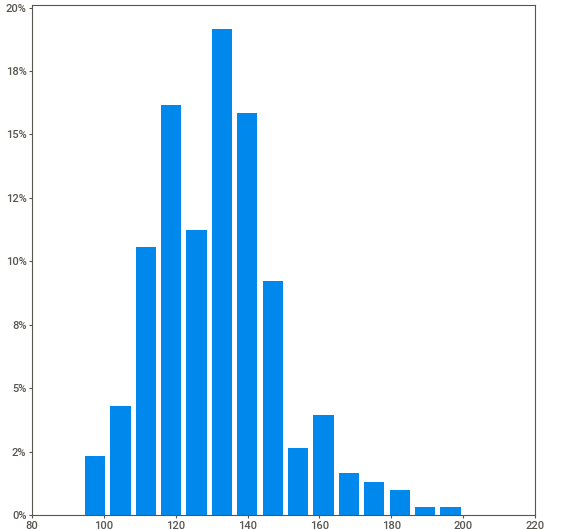
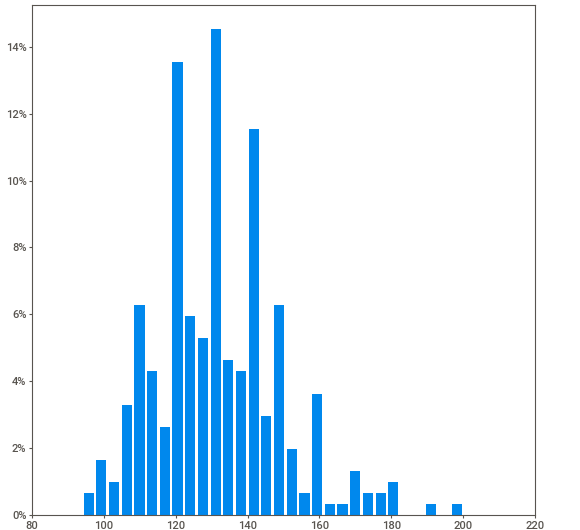
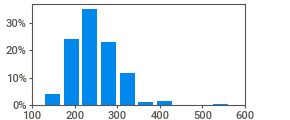
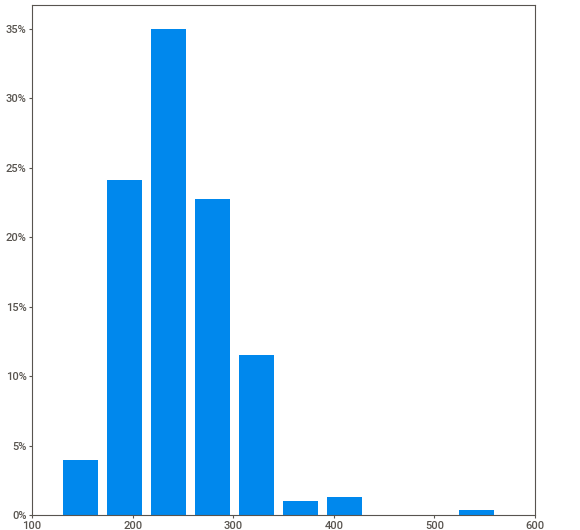
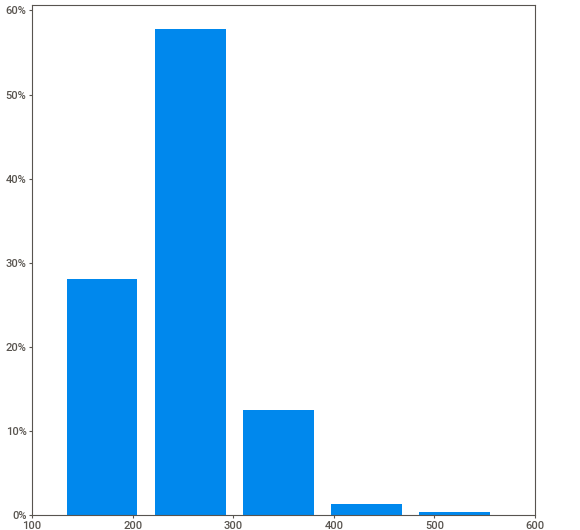
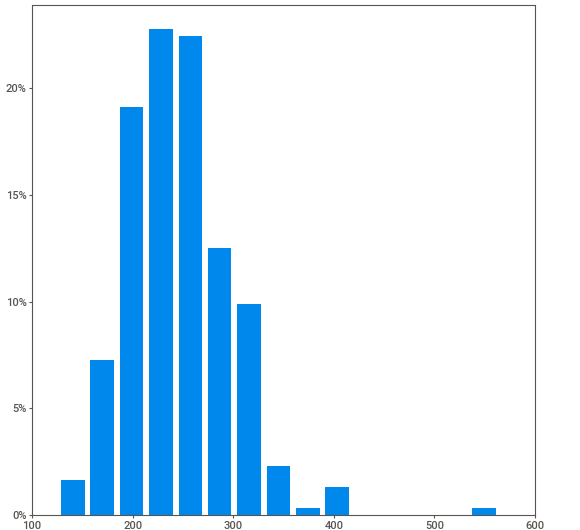
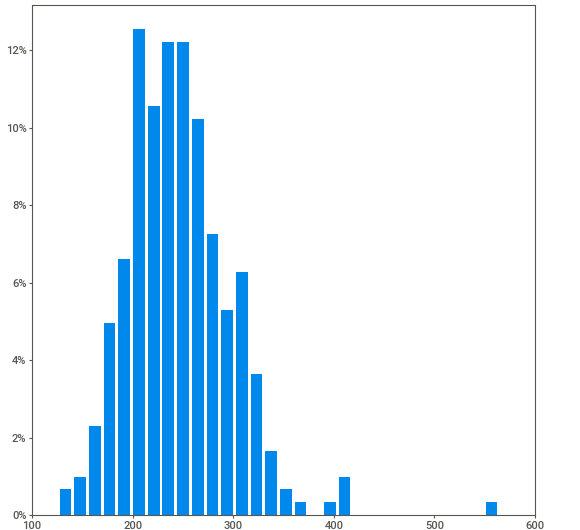
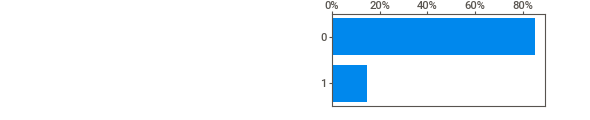
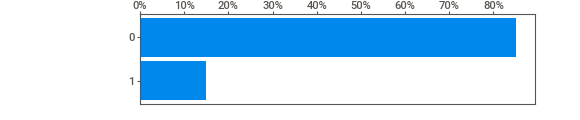
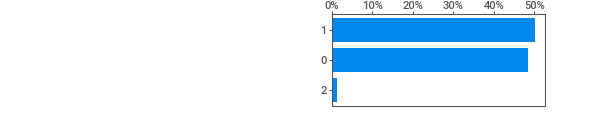
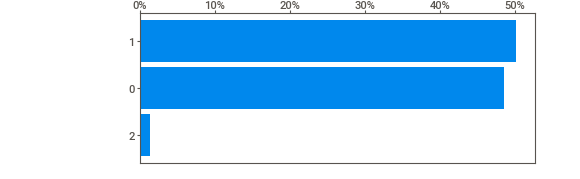
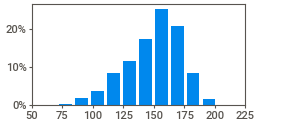
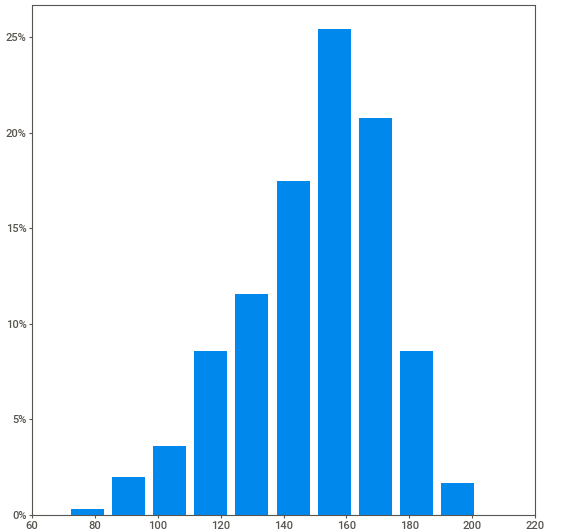
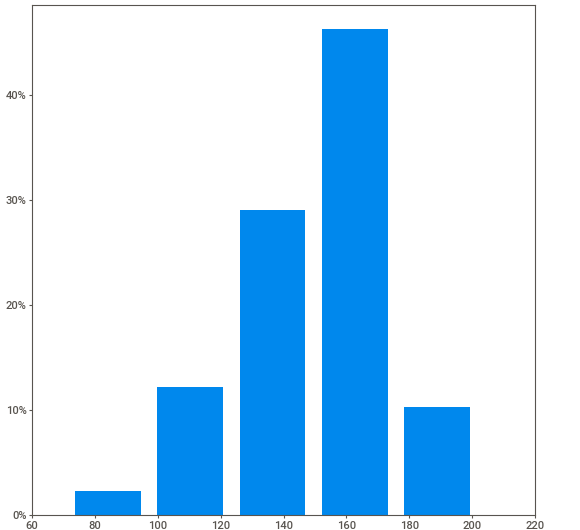
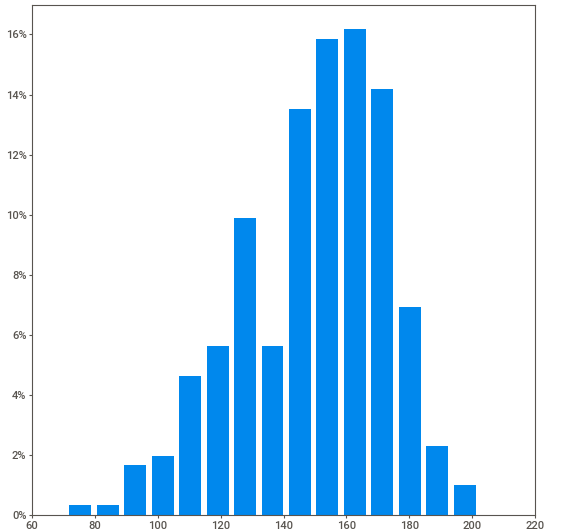
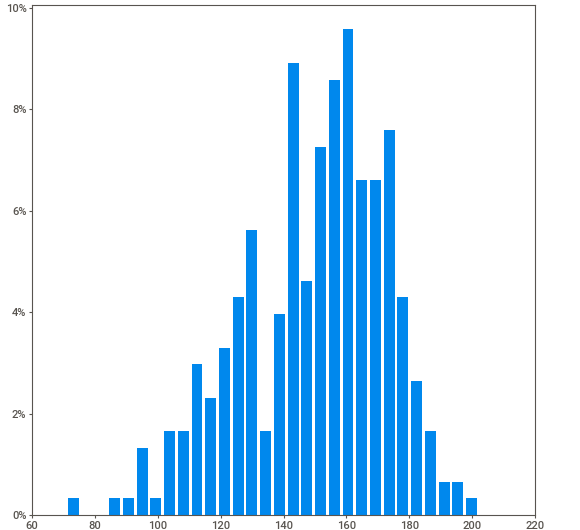
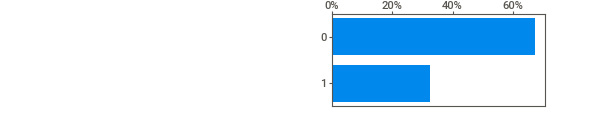
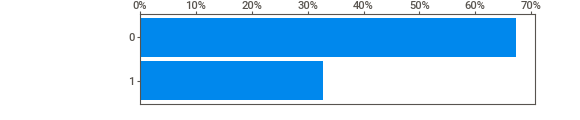
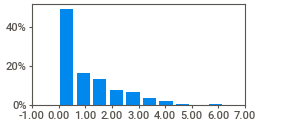
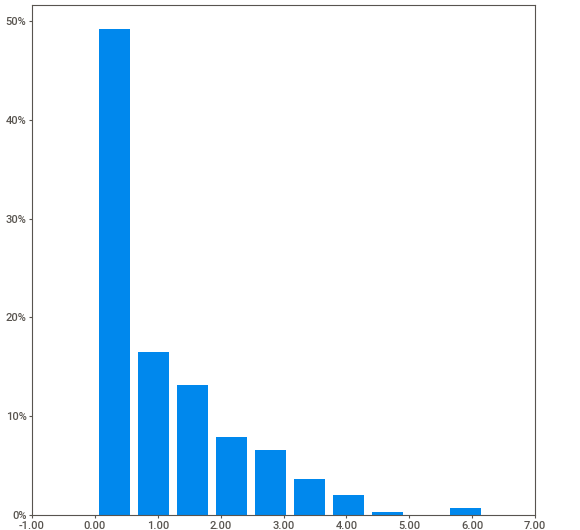
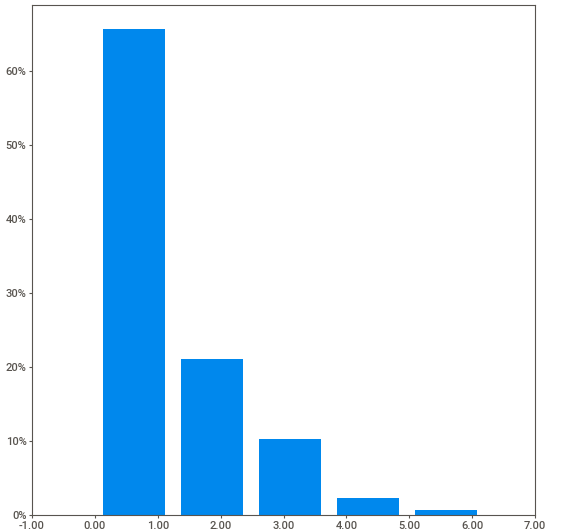
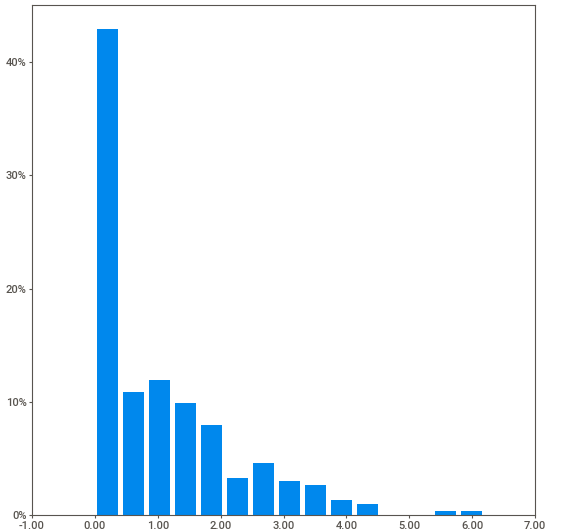
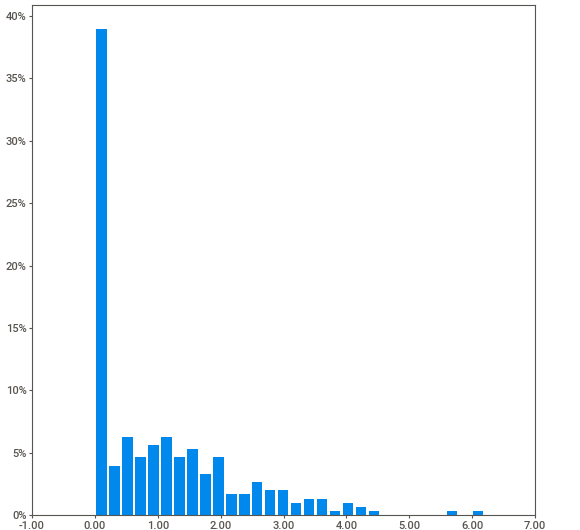
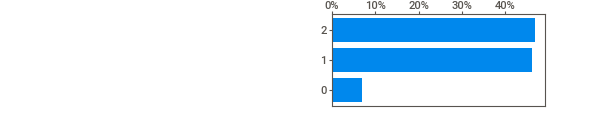
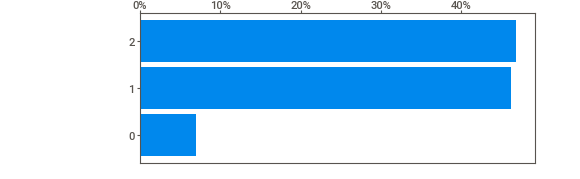
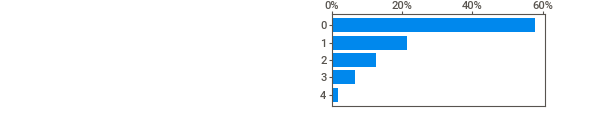
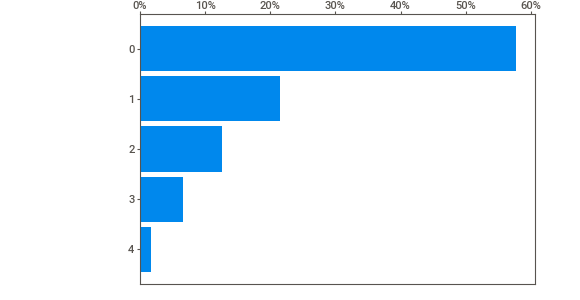
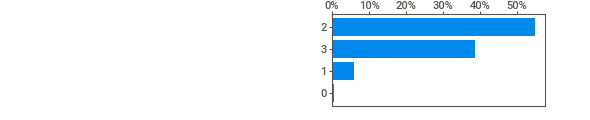
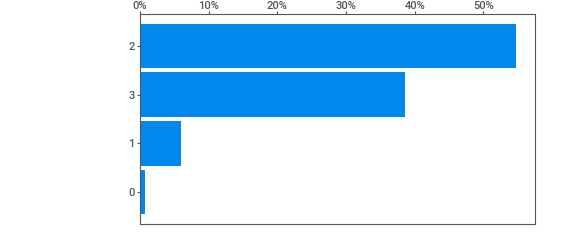
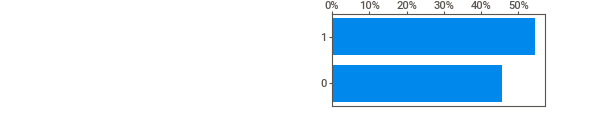
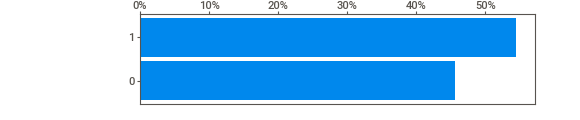
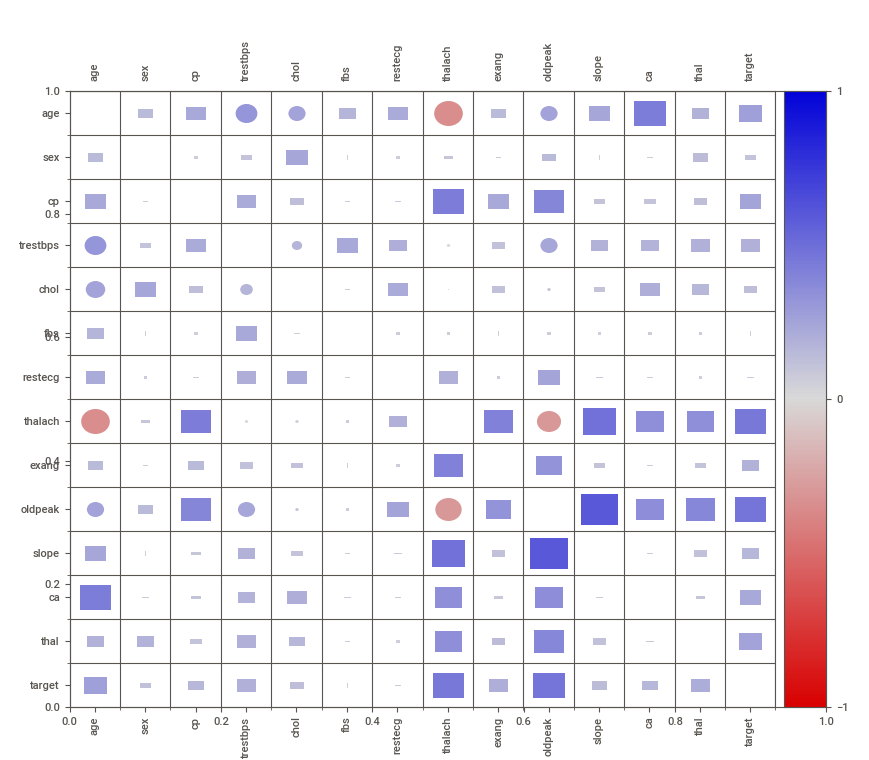
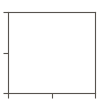

In [32]:
import pandas as pd
import sweetviz as sv

# Load your data
data = pd.read_csv('/content/heart-1.csv')

# Generate a Sweetviz report for the dataset
report = sv.analyze(data)

# Display the report in a Jupyter Notebook
report.show_notebook()

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.




In [33]:
X = df.drop(columns=['target'])#independent variable
y = df['target']#dependnet or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [35]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [36]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [37]:
y_test_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [38]:
accuracy_score(y_train_pred,y_train)

1.0

In [39]:
accuracy_score(y_test_pred,y_test)

0.7582417582417582

In [40]:
from sklearn.metrics import *

In [41]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.79      0.76      0.77        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [42]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7582417582417582


In [43]:
c_parameter_name = 'max_depth'
c_parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter, splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred) * 100
    df = pd.concat([df, pd.DataFrame({c_parameter_name: [input_parameter], 'accuracy': [acc_score]})], ignore_index=True)

print(df)

   max_depth  accuracy 
0       1     76.923077
1       2     73.626374
2       3     81.318681
3       4     76.923077
4       5     74.725275
5       6     71.428571
6       7     71.428571
7       8     74.725275
8       9     71.428571
9      10     71.428571
10     11     71.428571
11     12     71.428571
12     13     71.428571
13     14     72.527473
14     15     71.428571


In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, and y_test are already defined

c_parameter_name = 'max_depth'
c_parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_para in c_parameter_values:
    model = DecisionTreeClassifier(max_depth=input_para, splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred) * 100
    new_row = pd.DataFrame({c_parameter_name: [input_para], 'accuracy': [acc_score]})
    df = pd.concat([df, new_row], ignore_index=True)

print(df)

   max_depth  accuracy 
0       1     76.923077
1       2     73.626374
2       3     81.318681
3       4     76.923077
4       5     74.725275
5       6     71.428571
6       7     71.428571
7       8     71.428571
8       9     73.626374
9      10     74.725275
10     11     71.428571
11     12     72.527473
12     13     73.626374
13     14     71.428571
14     15     74.725275


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.79      0.76      0.77        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

